In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/Titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Let's find out the shape/size of our dataset
df.shape

(891, 12)

In [6]:
# Let's find out the data types and number of null values for each column/feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We find that there are missing values for age, and cabin. 'Embarked' has a couple of missing values which shouldn't be an issue. Let's take a look at the rows that have the 'Embarked parameter missing. Perhaps we can use features in these rows and others to determine what the value of embarking point would have been.

In [10]:
df[df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Let's start looking at some individual columns or features to observe their raw distribution.

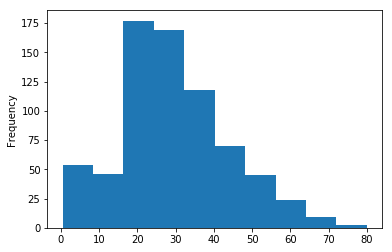

In [11]:
df['Age'].plot(kind='hist')

This tells us most of the people aboard the Titanic (or to be accurate, in this dataset) were in the age range of ~18-30, and we have a continuos decrease in frequency as we increase our age. Let us look at the distribution of the 'Age' feature in some more ways using methods available in Pandas.

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

You could also use df['Age'].value_counts(). These functions do a great job of giving us more information regarding the most common values held, mean, standard deviation, etc. However, we humans (most of us?) are much better at getting a quick perception and summary of the data using visualizations. So now, let's create multiple plots so that we can observe the raw distribution of all relevant features in the same figure.

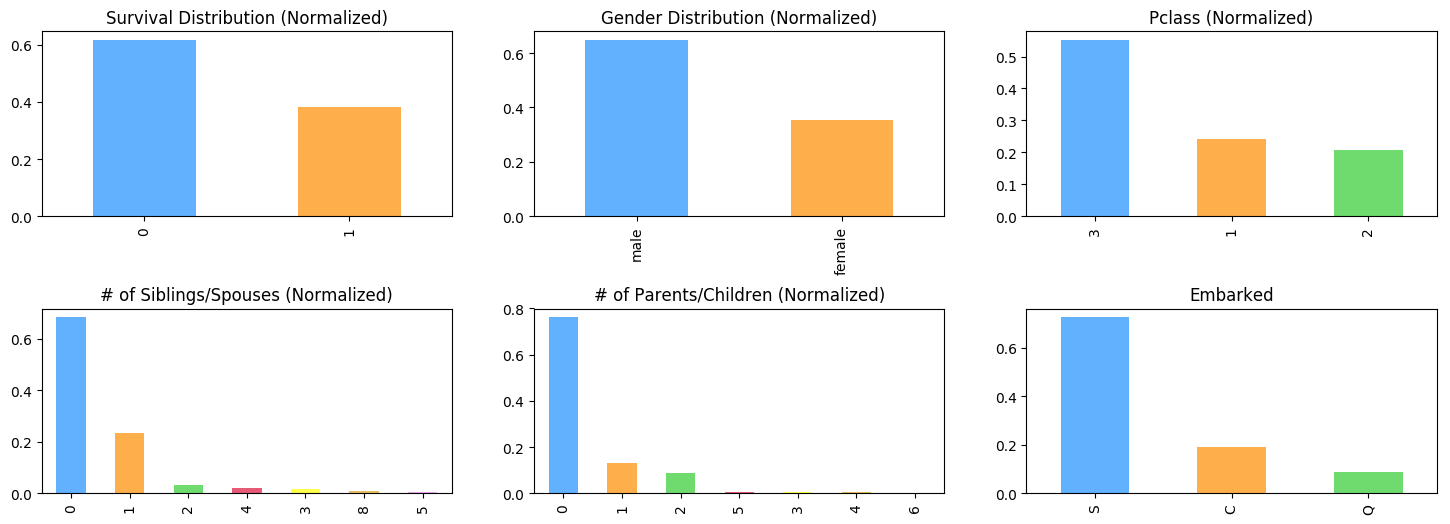

In [35]:
# Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
plt.style.use('default')

fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((2,3), (0,0))
df['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival Distribution (Normalized)')

plt.subplot2grid((2,3), (0,1))
df['Sex'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Gender Distribution (Normalized)')

plt.subplot2grid((2,3), (0,2))
df['Pclass'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Pclass (Normalized)')

plt.subplot2grid((2,3), (1,0))
df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32', 
                                                                            '#DC143C', '#FFFF00', '#DAA520',
                                                                           '#EE82EE'])
plt.title('# of Siblings/Spouses (Normalized)')

plt.subplot2grid((2,3), (1,1))
df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32',
                                                                           '#DC143C', '#FFFF00', '#DAA520',
                                                                           '#EE82EE'])
plt.title('# of Parents/Children (Normalized)')

plt.subplot2grid((2,3), (1,2))
df['Embarked'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Embarked')

plt.savefig('plots/dataset_distribution.png', dpi=300, transparent=False)

Right then, so now we know that most of people died, the number of men are twice as much as the women, most people belonged to the Ticket Class 3, did not travel with their siblings/spouses/parents/children, and embarked from Southampton. All this with a quick glance! You will notice I used percentage notion instead o just raw numbers, as this gives a better perception regarding the distribution :-)

I think it is time to observe/establish the relationships between independed features, if any. For example, what is the survival rate based on gender, or ticket class? To observe these bivariate relationships, let's use a similar subplot structure like we used to view the univariate distributions above.

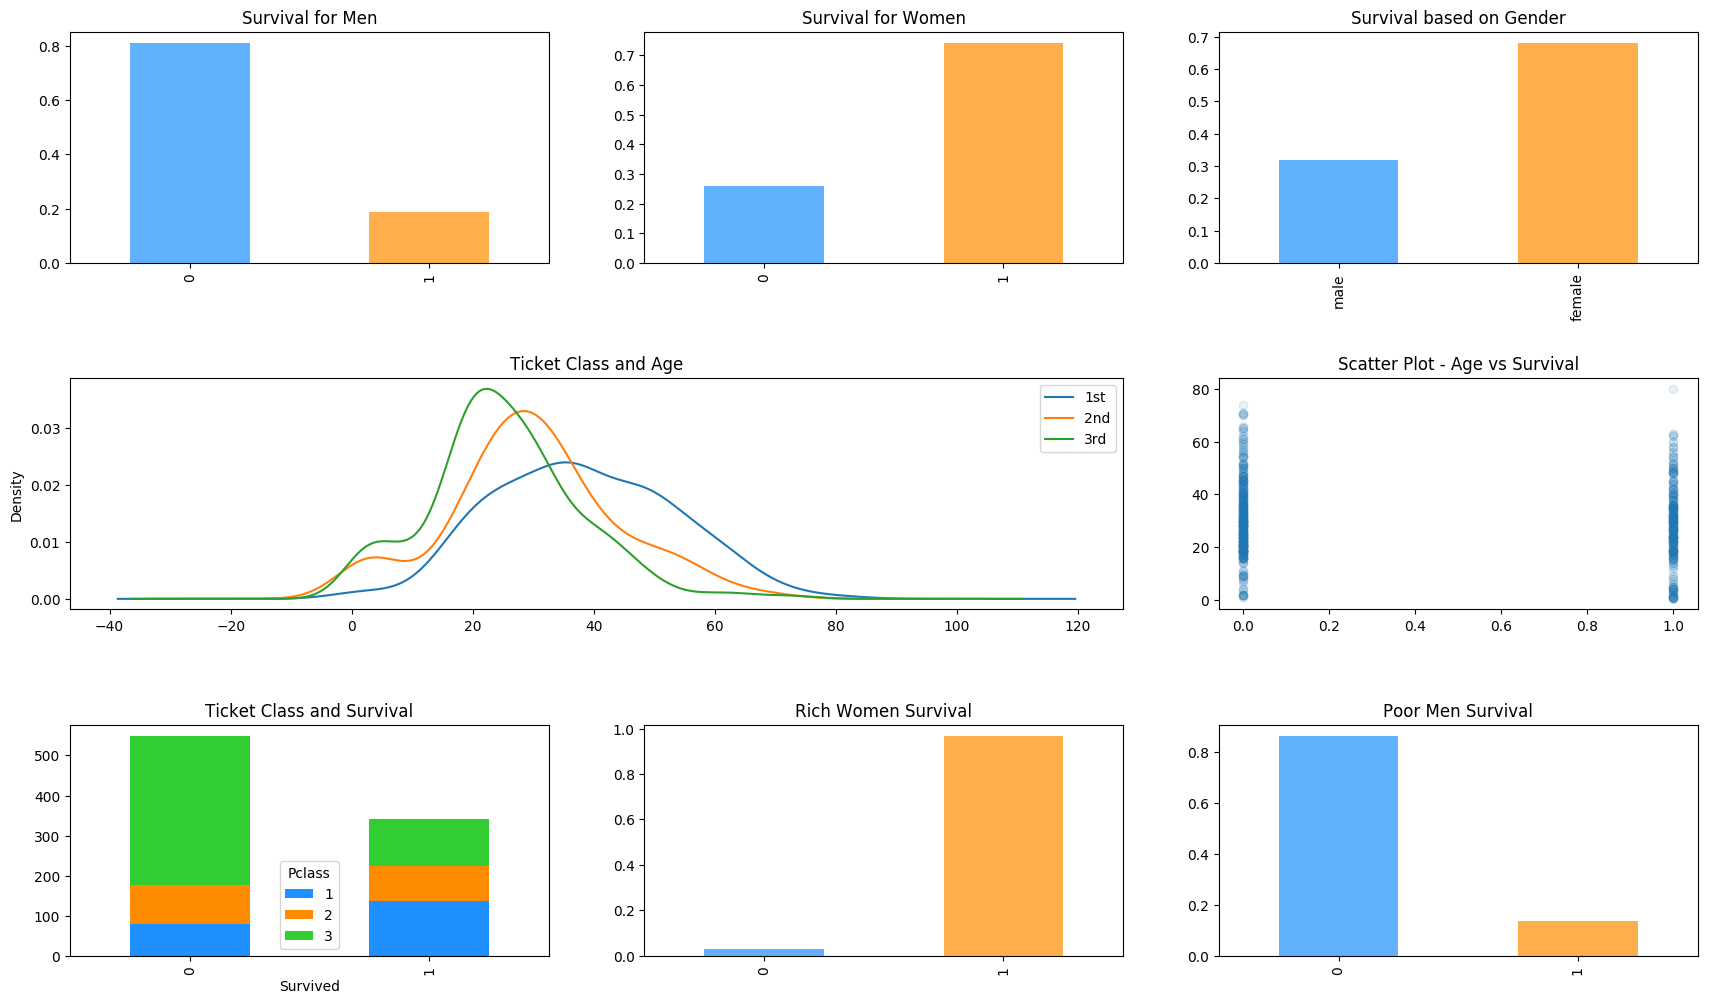

In [42]:
fig = plt.figure(figsize=(21,12))
plt.subplots_adjust(hspace=0.5)

plt.subplot2grid((3,3), (0,0))
male = df[df['Sex']=='male']
male['Survived'].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival for Men')

plt.subplot2grid((3,3), (0,1))
female = df[df['Sex']=='female']
female['Survived'].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival for Women')

plt.subplot2grid((3,3), (0,2))
df['Sex'][df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Survival based on Gender')

plt.subplot2grid((3,3), (1,0), colspan=2)
for ticketclass in sorted(df['Pclass'].unique()):
    df['Age'][df['Pclass']==ticketclass].plot(kind='kde')
plt.legend(('1st','2nd','3rd'))
plt.title('Ticket Class and Age')

plt.subplot2grid((3,3), (1,2))
plt.scatter(df['Survived'], df['Age'], alpha=0.1)
plt.title('Scatter Plot - Age vs Survival')

ax = plt.subplot2grid((3,3), (2,0))
df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True, ax=ax, color=['#1E90FF','#FF8C00', '#32CD32'])
plt.title('Ticket Class and Survival')

plt.subplot2grid((3,3), (2,1))
df['Survived'][(df['Sex']=='female') & (df['Pclass']==1)].value_counts(normalize=True, ascending=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Rich Women Survival')

plt.subplot2grid((3,3), (2,2))
df['Survived'][(df['Sex']=='male') & (df['Pclass']==3)].value_counts(normalize=True).plot(kind='bar', alpha=0.7, color=['#1E90FF','#FF8C00'])
plt.title('Poor Men Survival')

plt.savefig('plots/bivariate_analysis.png', dpi=300, transparent=False)

We are really starting to find some trends with these graphs.

1. From the first row of graphs, it is easy to see that the survival rate for men is much lower than that of women on the ship.
2. The ticket class has a role to play as well, the older you are, more likely it is that you were able to get a higher class seat. From the scatter plot, you can see that there if you were under a certain age, you had a higher chance for survival.
3. The stacked bar graph shows that if you had a first class ticket, you had a higher likelihood of survival. The next two plots show the likelihood of survival of rich women (ticket class 1) and poor men (ticket class 3).

From the above graphs, one can make a simple model, predict all women to survive. This will be an appropriate first submission before using any algorithms. It gives a score of 0.76555, a strong improvement on a coin toss. But our model wouldn't really be anything to boast about. For that, we must use some learning algorithms.

I have chosen Sci Kit Learn and logistic regression to improve our submission score. Before we do this, however, we must clean our training data by filling in the missing values with an average representation of that feature in the dataset. Also, categorical variables like 'Sex' and 'Embarked' need to be converted to numeric values for the learning algorithm. The function below performs a basic cleaning.

In [43]:
# Clean the data and fill missing values
def clean_data(data):
    data['Fare'] = data['Fare'].fillna(data['Fare'].dropna().median())
    data['Age'] = data['Age'].fillna(data['Age'].dropna().median())
    
    # Encode categorical variables
    data.loc[data['Sex'] == 'male', 'Sex']=0
    data.loc[data['Sex'] == 'female', 'Sex']=1
    
    # Most common embarkment point
    data['Embarked'] = data['Embarked'].fillna('S')
    data.loc[data['Embarked']=='S','Embarked'] = 0
    data.loc[data['Embarked']=='C','Embarked'] = 1    
    data.loc[data['Embarked']=='Q','Embarked'] = 2

In [44]:
from sklearn import linear_model

train = pd.read_csv('data/titanic/train.csv')
clean_data(train)

In [50]:
# Basic Training, no splitting of test and training values
target = train['Survived'].values
features = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
classifier = linear_model.LogisticRegression(solver='liblinear')
classifier_ = classifier.fit(features, target)
print(classifier_.score(features, target))

0.8002244668911336
